Having trouble installing tensorflow gpu.
Went on https://www.youtube.com/watch?v=dZh_ps8gKgs
5 key steps:
1. Python using Anaconda
2. Visual C++ Build Tools
    stopped at 7:39 of video
3. CUDA and CUDNN for NVIDIA
    Might not be able to with Mac(don't need it but makes running deeplearning models much faster)
    
4. Protoc
5. Tensorflow Object Detection API

## 1.1 Install dependencies and Setup

In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import numpy as np
import pandas as pd
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [17]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
        #this basically tells tf to not use up all the memory and keep to an absolute minimum

In [18]:
gpus
#turned on GPUs by going to settings-> Accelerator-> gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

## 1.2 Remove Unwanted Images

In [19]:
import shutil
import os

input_path = '/kaggle/input'
working_path = '/kaggle/working'

# Get the list of files and directories in the input directory
shutil.copytree(input_path, working_path, dirs_exist_ok=True)

'/kaggle/working'

In [20]:
#install packages to read and check data.
import shutil

import cv2
import imghdr
from matplotlib import pyplot as plt

#the type of image files supported by tf 
image_exts = ['jpeg', 'jpg', 'bmp', 'png']


for image_class in os.listdir(working_path): 
    for image_folder in os.listdir(os.path.join(working_path, image_class)):
        for image in os.listdir(os.path.join(working_path, image_class, image_folder)):
            image_path = os.path.join(working_path, image_class, image_folder, image)
            try: 
                img = cv2.imread(image_path)
                #check to see if it can run on openCV
                tip = imghdr.what(image_path)
                #identifies the image type
                if tip not in image_exts: 
                    print('Image not in ext list {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e: 
                print('Issue with image {}: {}'.format(image_path, str(e)))
                os.remove(image_path)

Image not in ext list /kaggle/working/sad-images/sad_people_images/african-american-depressive-sad-broken-260nw-475790911.jpg
Image not in ext list /kaggle/working/sad-images/sad_people_images/sad-serious-illness-womandepressed-emotion-260nw-1810793920.jpg
Image not in ext list /kaggle/working/sad-images/sad_people_images/sad-person-pictures-2bnso9uiwlhrikrx.jpg
Image not in ext list /kaggle/working/sad-images/sad_people_images/depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
Image not in ext list /kaggle/working/sad-images/sad_people_images/portrait-sad-man-600nw-126009806.jpg
Image not in ext list /kaggle/working/sad-images/sad_people_images/depositphotos_19568511-stock-photo-teenage-girl-looking-thoughtful-about.jpg
Image not in ext list /kaggle/working/sad-images/sad_people_images/1cd95b44e0d785987a6596d4baf940fc19-13-sad-white-man.2x.h473.w710.jpg
Image not in ext list /kaggle/working/sad-images/sad_people_images/CC_HE_1221887081_SituationalDepression.jpg
Image not in ext 

In [21]:
print("Files after processing:", os.listdir(working_path))

Files after processing: ['sad-images', 'happy-images']


# Get the list of files in the folder
files_in_folder = os.listdir(working_path)

# Remove files with the name '.virtual_documents'
for file_name in files_in_folder:
    file_path = os.path.join(working_path, file_name)
    
    if os.path.isfile(file_path) and file_name == '.virtual_documents':
        os.remove(file_path)
        print(f"File '{file_name}' removed.")

# Optionally, print the list of files after removal
print("Files after removal:", os.listdir(folder_path))

# 1.3 Load Data

In [22]:
#tf.data.dataset has a lot of capability itself. look into it further yourself

In [23]:
data = tf.keras.utils.image_dataset_from_directory(working_path)

Found 153 files belonging to 2 classes.


if you wanted to configure/adjust the dataset, here's an example photo
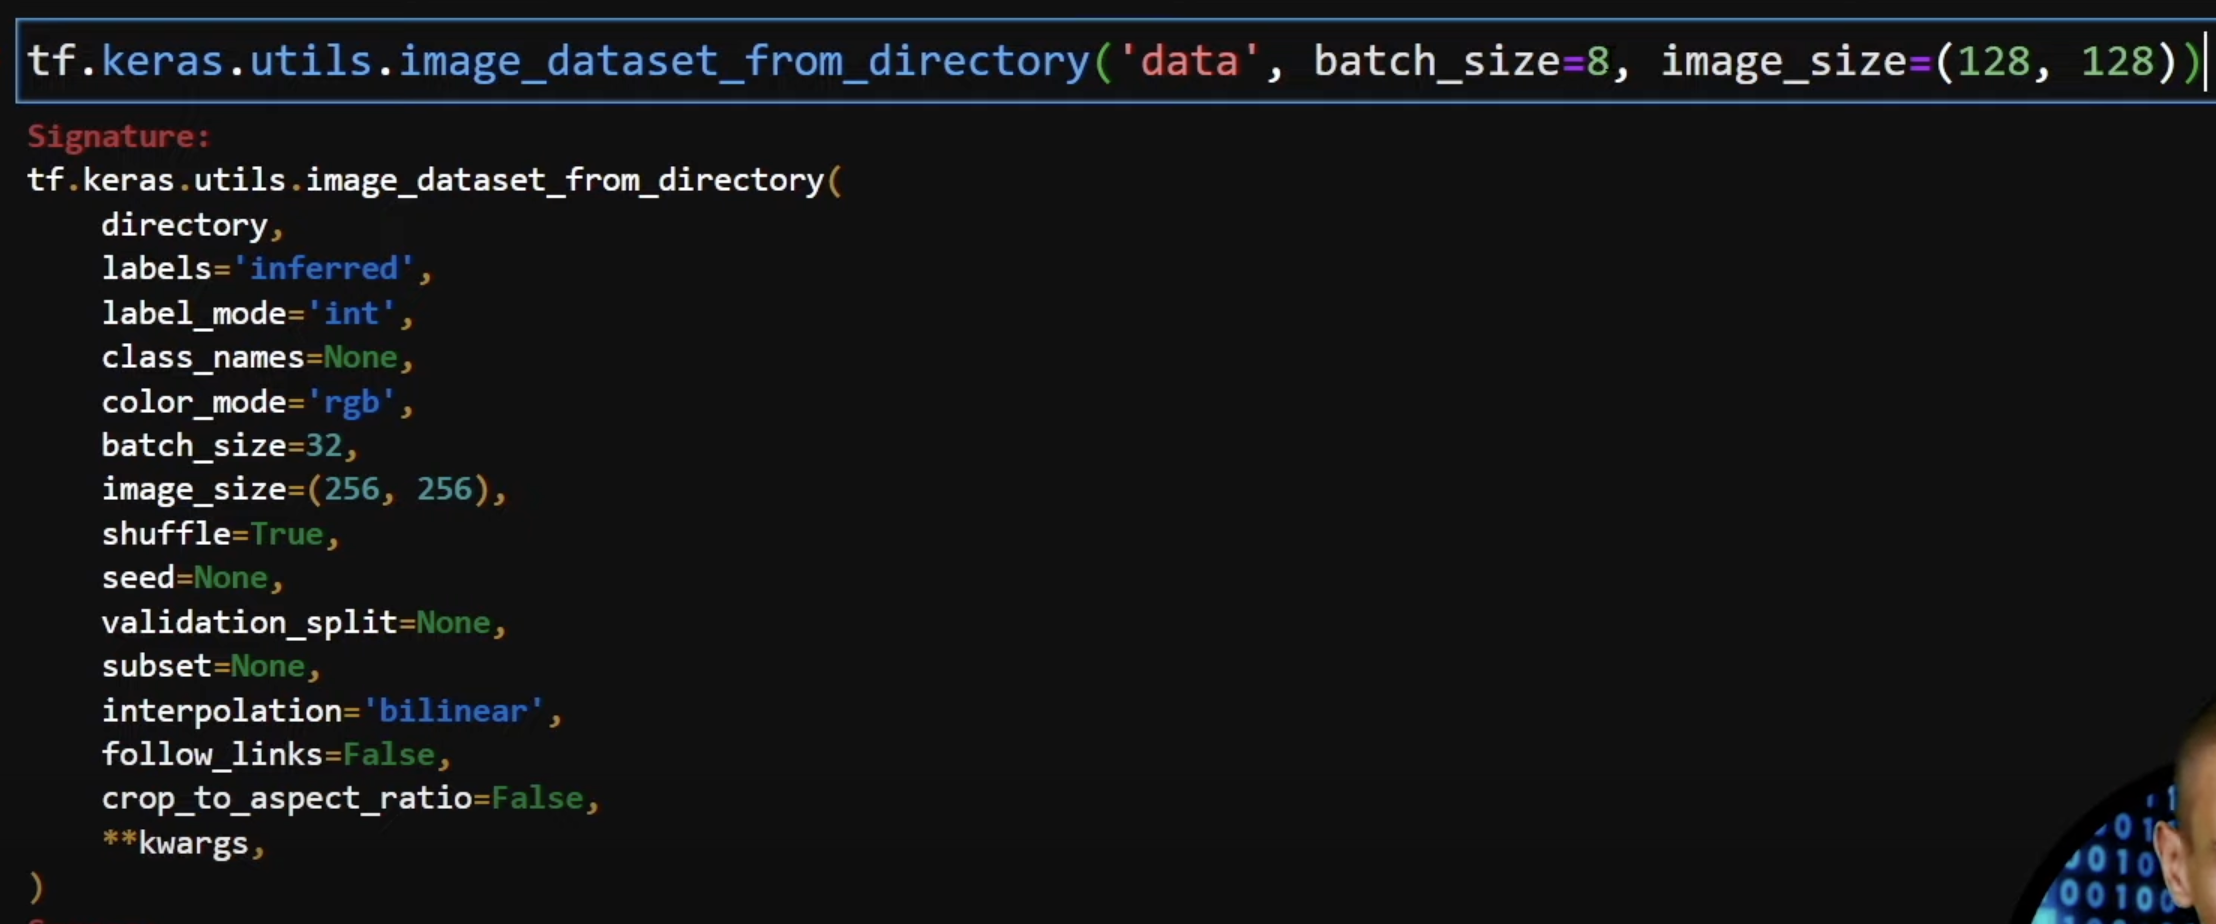

In [24]:
data.class_names

['happy-images', 'sad-images']

it created an extra class '.virtual_documents' that I didn't want. now I need to figure out a way to remove this class.

In [25]:
data_iterator = data.as_numpy_iterator()

In [26]:
batch = data_iterator.next()

In [27]:
len(batch)

2

In [28]:
batch[0].shape

(32, 256, 256, 3)

In [29]:
#class 0 = Happy People
#class 1 = Sad People
batch[1]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1], dtype=int32)

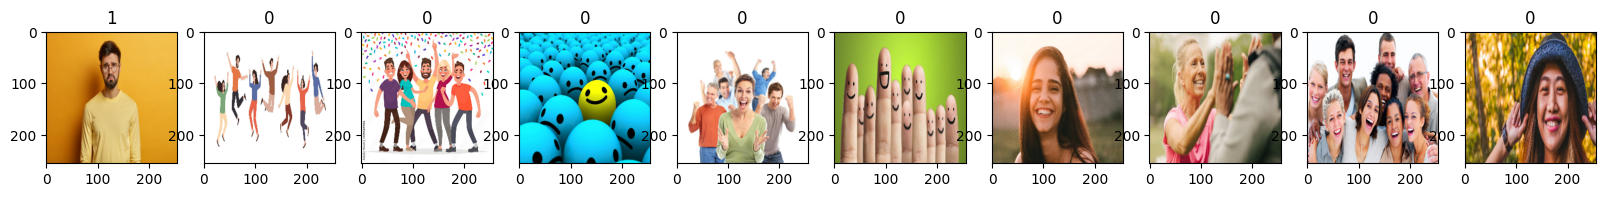

In [30]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Preprocess Data

# Scale
Want to scale down from 0-255 down to 0-1 to make it easier to process.

In [31]:
data = data.map(lambda x,y: (x/255, y))

In [32]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

# Split Data

In [33]:
len(data)

5

In [34]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [35]:
train_size+val_size+test_size

5

In [36]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [37]:
len(train)

3

In [38]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Making the Deep Learning Model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [40]:
model = Sequential()

In [41]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [42]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [44]:
logdir = 'kaggle/working/logs'

if not os.path.exists(logdir):
    os.makedirs(logdir)
    print(f"Folder '{logdir}' created successfully.")
else:
    print(f"Folder '{logdir}' already exists")

Folder 'kaggle/working/logs' created successfully.


In [45]:
logdir = 'kaggle/working/logs'

In [46]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='kaggle/working/logs')

In [47]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 8s 568ms/step - loss: 0.7425 - accuracy: 0.5000 - val_loss: 0.6259 - val_accuracy: 0.6562
Epoch 2/20
3/3 [==============================] - 2s 510ms/step - loss: 0.6398 - accuracy: 0.5938 - val_loss: 0.4872 - val_accuracy: 0.6875
Epoch 3/20
3/3 [==============================] - 2s 481ms/step - loss: 0.5513 - accuracy: 0.6875 - val_loss: 0.4983 - val_accuracy: 0.7812
Epoch 4/20
3/3 [==============================] - 2s 475ms/step - loss: 0.4687 - accuracy: 0.8646 - val_loss: 0.3580 - val_accuracy: 0.8750
Epoch 5/20
3/3 [==============================] - 2s 485ms/step - loss: 0.3510 - accuracy: 0.8333 - val_loss: 0.2810 - val_accuracy: 0.9062
Epoch 6/20
3/3 [==============================] - 2s 492ms/step - loss: 0.3564 - accuracy: 0.8646 - val_loss: 0.2359 - val_accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 2s 501ms/step - loss: 0.3037 - accuracy: 0.9062 - val_loss: 0.1568 - val_accuracy: 1.0000
Epoch 8/20
3/3 [====

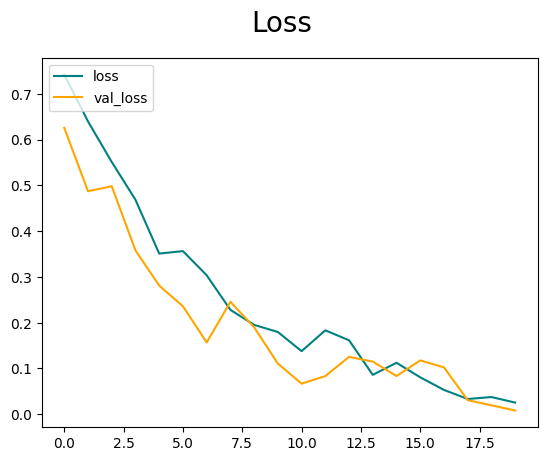

In [48]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

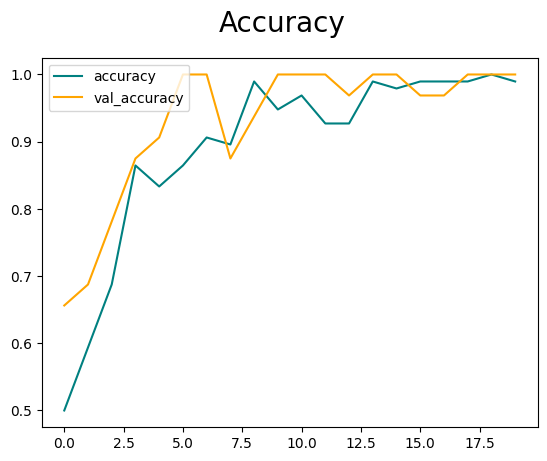

In [49]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [50]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

^different measures to assess ML models

In [57]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [58]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 30ms/step


In [60]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


# Test the Model

In [ ]:
#upload to test images(one happy and one sad that are )

# Save the Model

In [61]:
from tensorflow.keras.models import load_model

In [62]:
model.save(os.path.join('models','imageclassifier.h5'))

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


And that is the end of recreating my first CNN image classification model. Woo Woo!